In [2]:
# El simbolo '!' sirve para correr comandos de bash en jupyter notebook.
!kaggle datasets download -d nikhil7280/student-performance-multiple-linear-regression -p /Users/josealmendarez/Documents/Coding/Proyecto_de_Bayesianos/data/

Dataset URL: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression
License(s): other
student-performance-multiple-linear-regression.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!pwd

/Users/josealmendarez/Documents/Coding/Proyecto_de_Bayesianos


In [4]:
#P.D.
t = %pwd
print(t)

/Users/josealmendarez/Documents/Coding/Proyecto_de_Bayesianos


In [5]:
%ls

data/          draft-2.ipynb  draft.ipynb


In [6]:
%ls data

Student_Performance.csv
df_clasificacion.csv
df_regresion.csv
df_regresion_students.csv
mobile_dataset.zip
student-performance-multiple-linear-regression.zip
user_behavior_dataset.csv


In [7]:
%%time
%cd /Users/josealmendarez/Documents/Coding/Proyecto_de_Bayesianos/data/ 
# -> %cd {pwd}/data
!unzip -o student-performance-multiple-linear-regression.zip
%cd ..

/Users/josealmendarez/Documents/Coding/Proyecto_de_Bayesianos/data
Archive:  student-performance-multiple-linear-regression.zip
  inflating: Student_Performance.csv  
/Users/josealmendarez/Documents/Coding/Proyecto_de_Bayesianos
CPU times: user 4.46 ms, sys: 9 ms, total: 13.5 ms
Wall time: 135 ms


In [8]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('data/student_performance.csv')

In [10]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [11]:
# Revisamos que la metrica significa lo que siponemos
(df['Performance Index'].min(), df['Performance Index'].max())

(10.0, 100.0)

In [12]:
#Estado de los datos.
print(df.isnull().sum())

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


Comentario: no es necesario ninguna imputacion en los datos de origen pues no existen datos nulos en el conjunto de datos o información.

In [14]:
# AED - breve.
print(df.info())
print(df.describe())
print(df.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.

In [15]:
# Preparación(preprocesamiento) y observación de los datos.

In [16]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

In [17]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [18]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
continuas = df.columns
print(continuas)

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


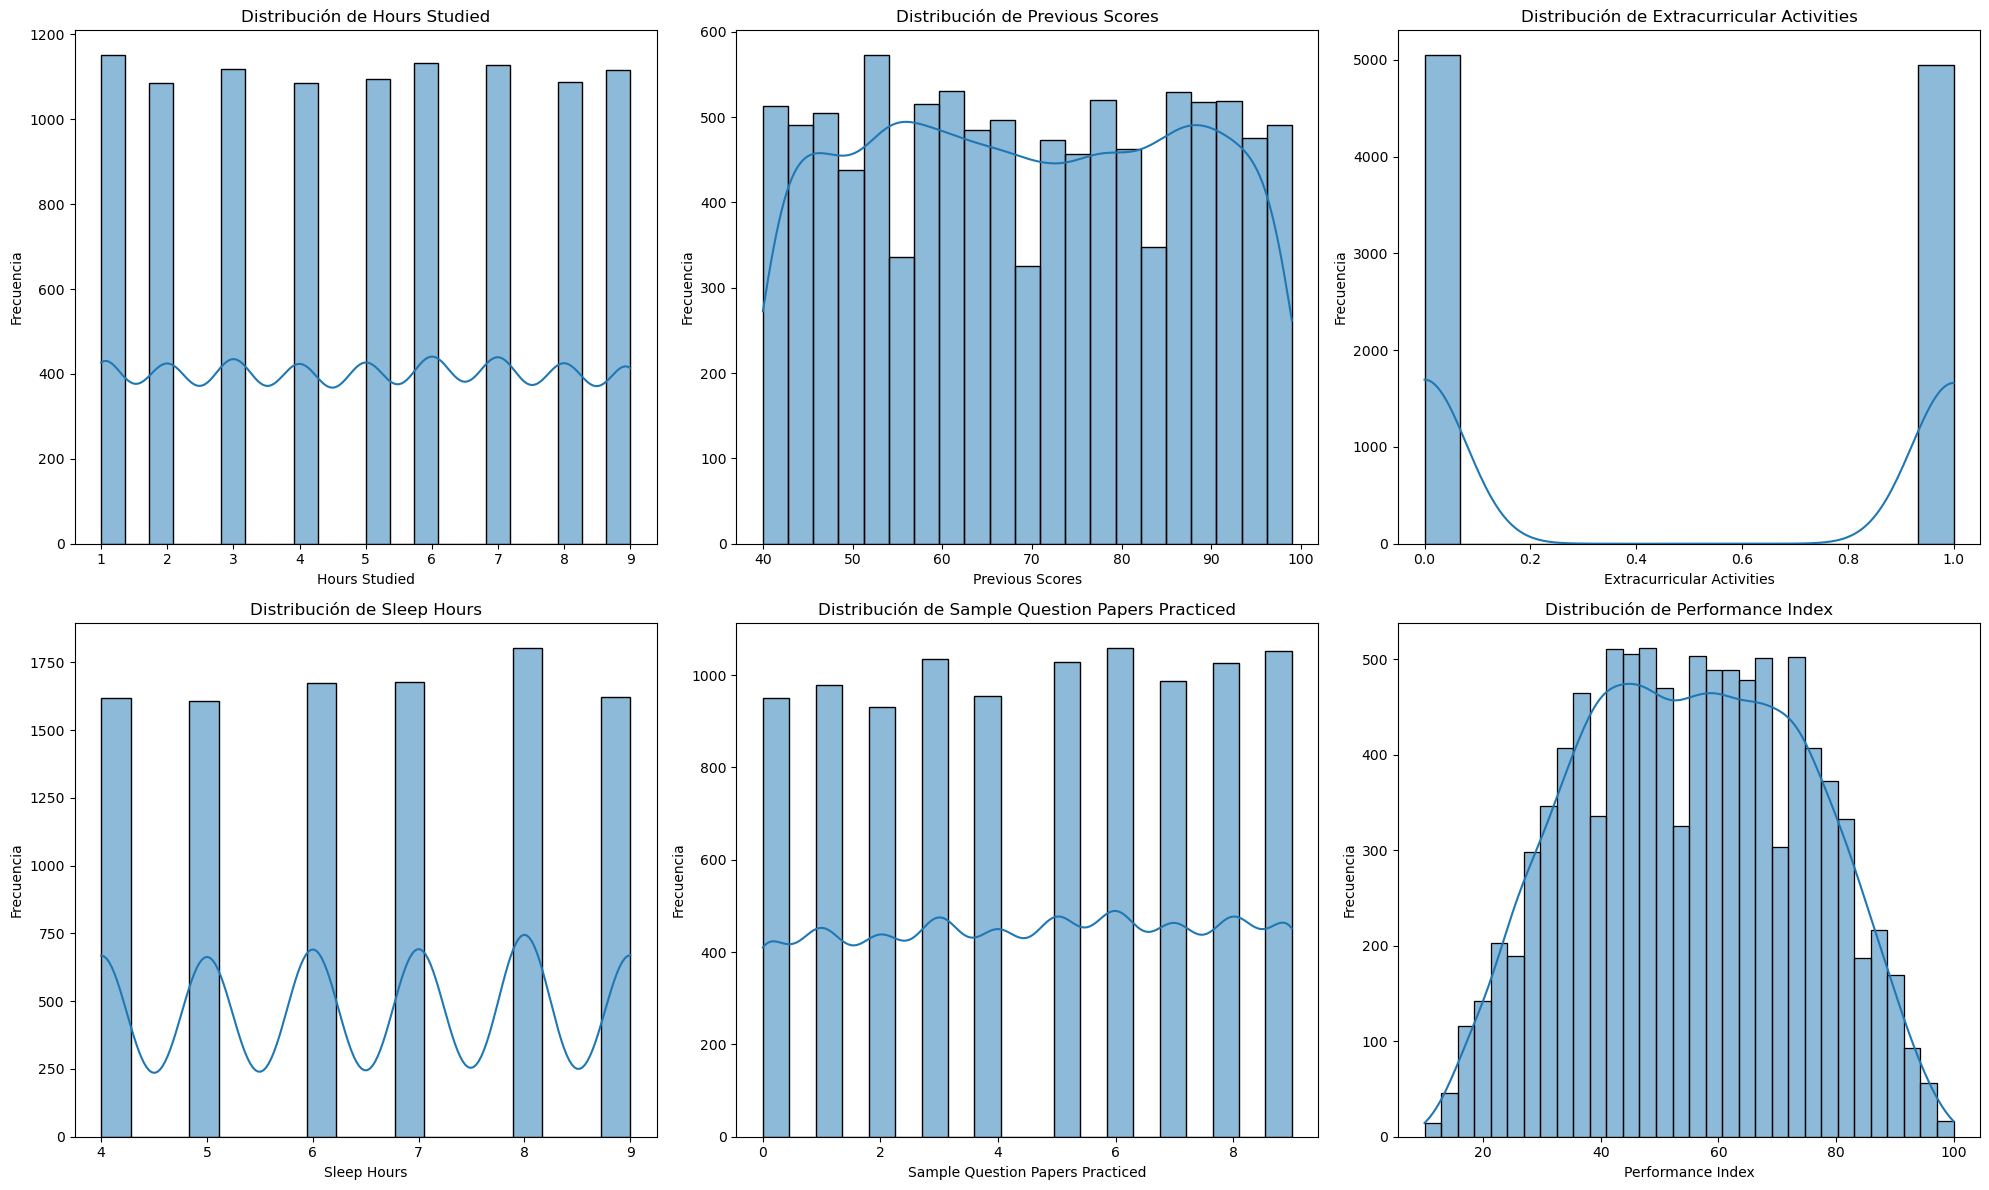

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, var in enumerate(df):
    sns.histplot(data=df, x=var, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribución de {var}')
    axes[idx].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [23]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [24]:
variables_predictoras = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']
variable_objetivo = 'Performance Index'

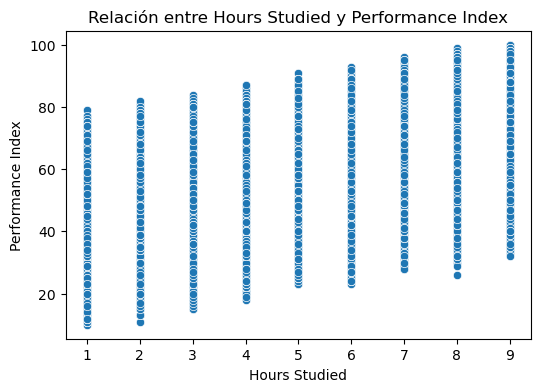

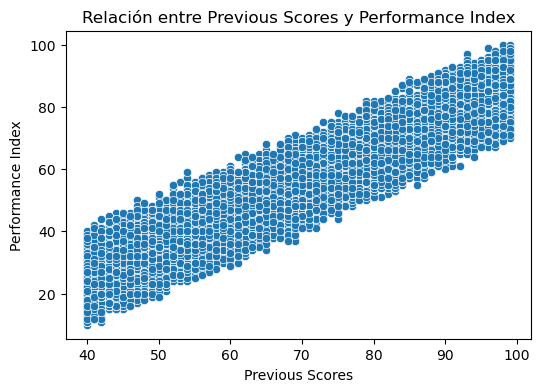

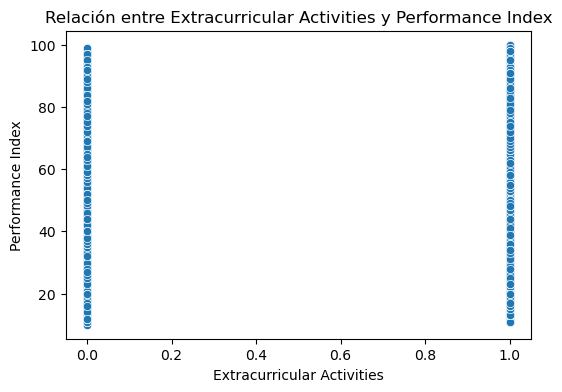

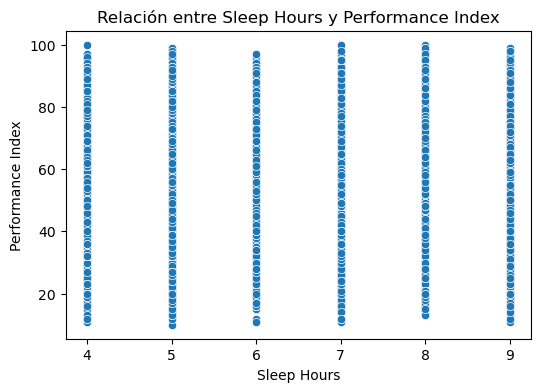

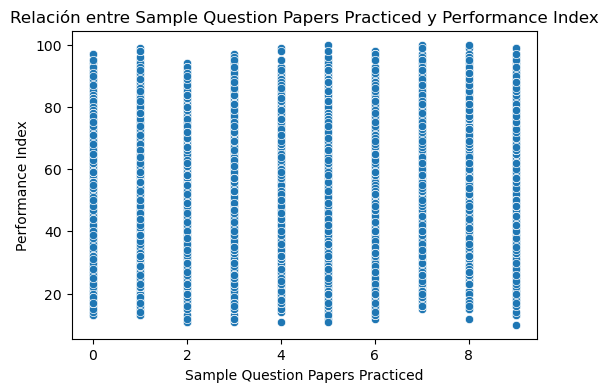

In [25]:
for predictor in variables_predictoras:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=predictor, y=variable_objetivo)
    plt.title(f'Relación entre {predictor} y {variable_objetivo}')
    plt.show()

In [26]:
correlation_matrix = df.corr()

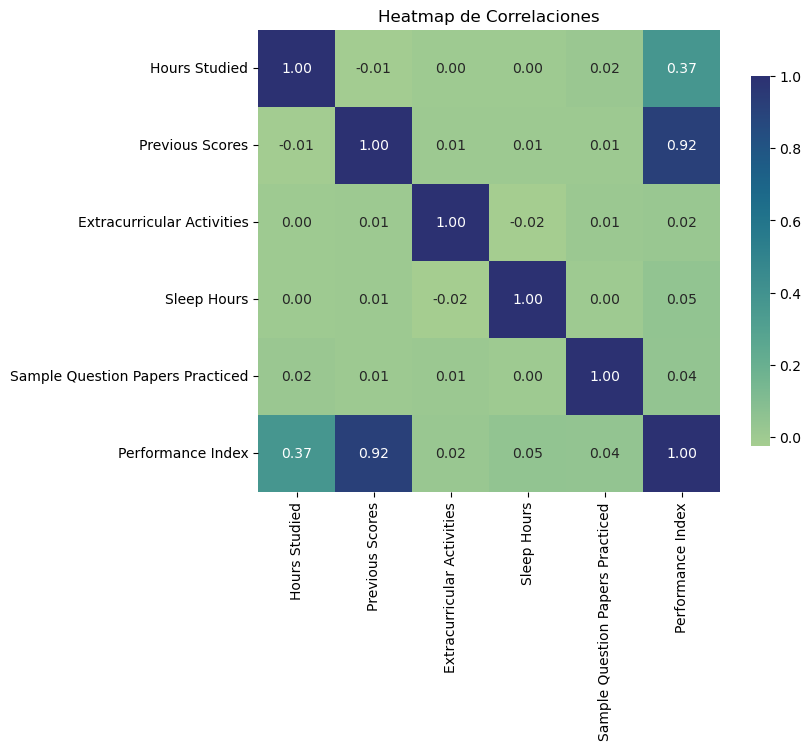

In [27]:
plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='crest', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap de Correlaciones')
plt.show()

comentario: no es necesaria ningun tipo de transformacion de los datos.

In [29]:
# Modelo de regresión

In [30]:
import pymc as pm
import arviz as az
import numpy as np

In [31]:
df_regresion = df.copy()

In [32]:
df_regresion = df_regresion.drop('Previous Scores', axis=1)

In [33]:
df_regresion.head()

,Hours Studied,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,1,9,1,91.0
1,4,0,4,2,65.0
2,8,1,7,2,45.0
3,5,1,5,2,36.0
4,7,0,8,5,66.0


In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
X = df_regresion.drop('Performance Index', axis=1)
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
y = df_regresion['Performance Index'].values

In [37]:
%%time
with pm.Model() as model:
    beta = pm.Normal('beta', mu=0, sigma=10, shape=X_scaled.shape[1])
    sigma = pm.HalfNormal('sigma', sigma=50)
    alpha = pm.Normal('alpha', mu=np.mean(y), sigma=np.std(y))
    mu = alpha + pm.math.dot(X_scaled, beta)
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y)
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma, alpha]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 6 seconds.


CPU times: user 5.32 s, sys: 1.28 s, total: 6.6 s
Wall time: 9.72 s


In [38]:
summary = az.summary(trace)
print("\nResumen del modelo:")
print(summary)


Resumen del modelo:
           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]   7.164  0.181   6.829    7.509      0.001    0.001   15008.0   
beta[1]   0.453  0.177   0.130    0.785      0.002    0.001   13446.0   
beta[2]   0.925  0.179   0.588    1.252      0.002    0.001   13017.0   
beta[3]   0.698  0.176   0.362    1.012      0.002    0.001   13564.0   
alpha    55.226  0.182  54.888   55.567      0.002    0.001   11698.0   
sigma    17.785  0.123  17.546   18.009      0.001    0.001   11719.0   

         ess_tail  r_hat  
beta[0]    6962.0    1.0  
beta[1]    6388.0    1.0  
beta[2]    6298.0    1.0  
beta[3]    6851.0    1.0  
alpha      6707.0    1.0  
sigma      6699.0    1.0  


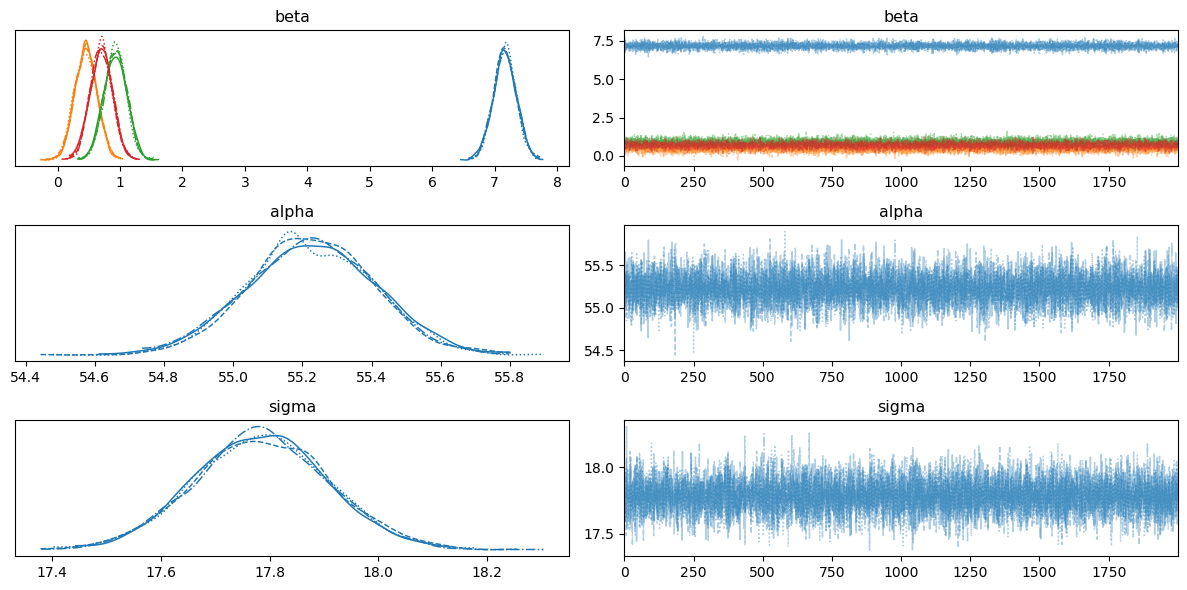

In [39]:
az.plot_trace(trace)
plt.tight_layout()

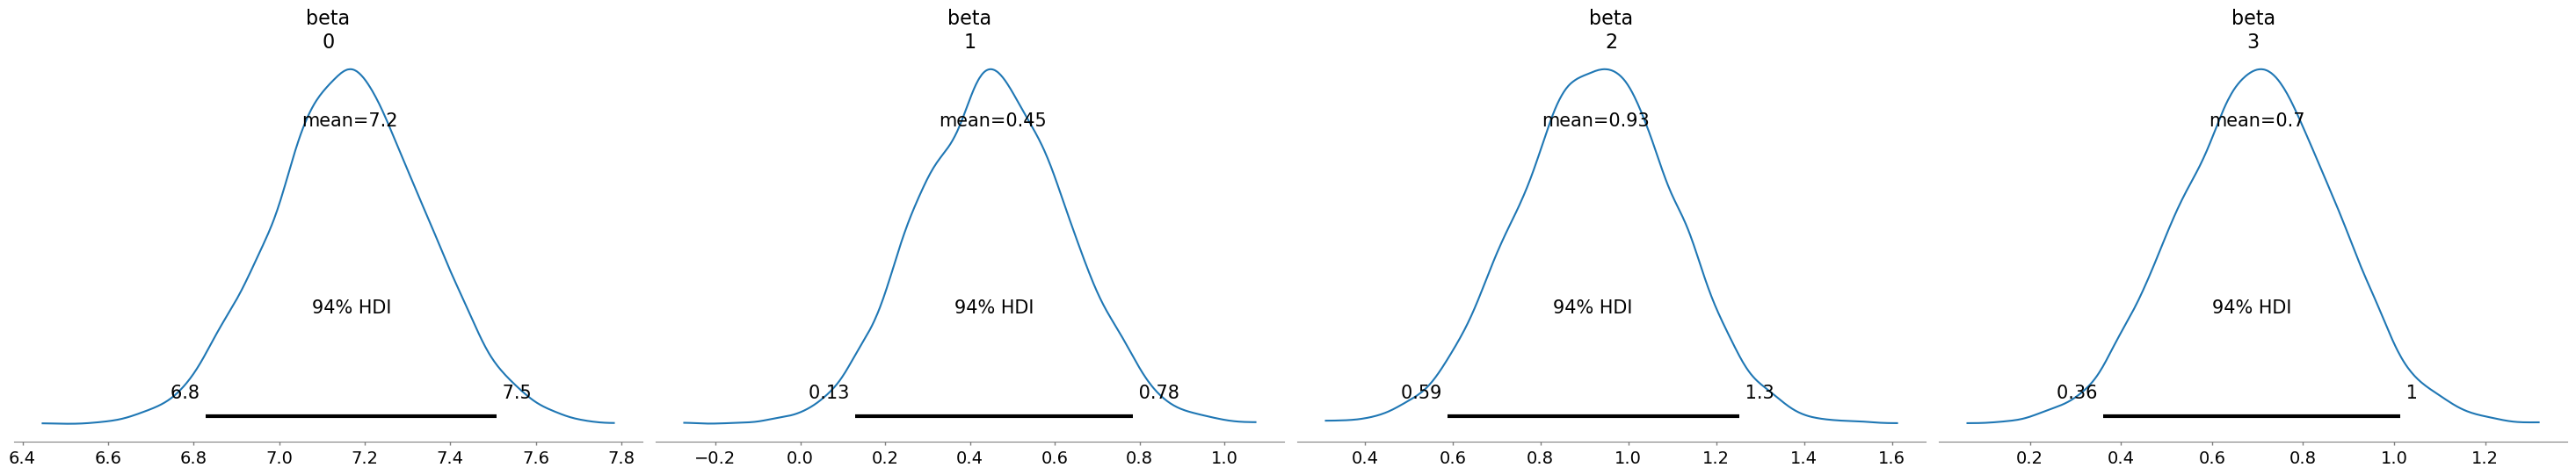

In [40]:
az.plot_posterior(trace, var_names=['beta'])
plt.tight_layout()

In [41]:
alpha_mean = float(trace.posterior['alpha'].mean())  # Convertir a escalar
beta_mean = trace.posterior['beta'].mean(dim=['chain', 'draw']).values  

In [42]:
y_pred = alpha_mean + np.dot(X_scaled, beta_mean)
r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)

In [43]:
print("\nCoeficientes estandarizados (media posterior):")
for var, coef in zip(X.columns, trace.posterior['beta'].mean(axis=(0,1))):
    print(f"{var}: {coef:.3f}")


Coeficientes estandarizados (media posterior):
Hours Studied: 7.164
Extracurricular Activities: 0.453
Sleep Hours: 0.925
Sample Question Papers Practiced: 0.698


In [44]:
print(f"\nR² del modelo: {r2:.3f}")


R² del modelo: 0.144


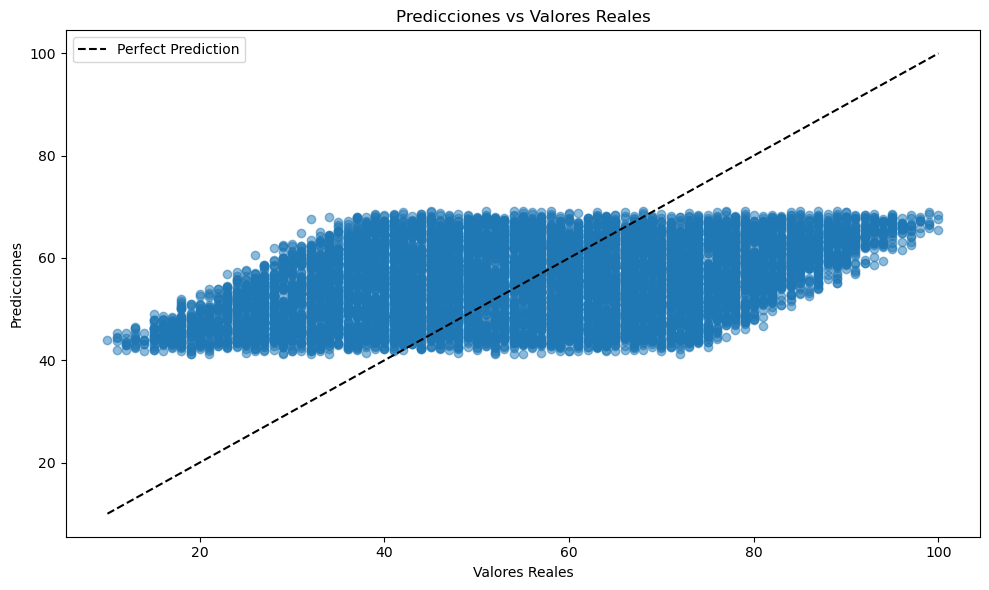

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label='Perfect Prediction')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.tight_layout()

In [46]:
y_pred_samples = np.zeros((len(trace.posterior.chain) * len(trace.posterior.draw), len(y)))

In [47]:
for i, chain in enumerate(trace.posterior.chain):
    for j, draw in enumerate(trace.posterior.draw):
        idx = i * len(trace.posterior.draw) + j
        alpha_sample = float(trace.posterior['alpha'].isel(chain=i, draw=j))
        beta_sample = trace.posterior['beta'].isel(chain=i, draw=j).values
        y_pred_samples[idx] = alpha_sample + np.dot(X_scaled, beta_sample)

In [48]:
pred_mean = y_pred_samples.mean(axis=0)
pred_hdi = az.hdi(y_pred_samples)

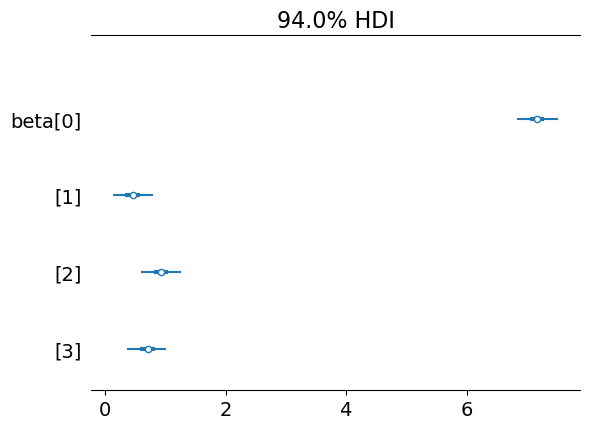

In [49]:
az.plot_forest(trace, var_names=['beta'], combined=True)
plt.tight_layout()

In [50]:
summary = az.summary(trace)
print("\nResumen del modelo:")
print(summary)


Resumen del modelo:
           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]   7.164  0.181   6.829    7.509      0.001    0.001   15008.0   
beta[1]   0.453  0.177   0.130    0.785      0.002    0.001   13446.0   
beta[2]   0.925  0.179   0.588    1.252      0.002    0.001   13017.0   
beta[3]   0.698  0.176   0.362    1.012      0.002    0.001   13564.0   
alpha    55.226  0.182  54.888   55.567      0.002    0.001   11698.0   
sigma    17.785  0.123  17.546   18.009      0.001    0.001   11719.0   

         ess_tail  r_hat  
beta[0]    6962.0    1.0  
beta[1]    6388.0    1.0  
beta[2]    6298.0    1.0  
beta[3]    6851.0    1.0  
alpha      6707.0    1.0  
sigma      6699.0    1.0  
